In [7]:
import matplotlib.pyplot as plt
import numpy as np
import ase

import abtem

(examples:hrtem_quickstart)=
# HRTEM quickstart

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: xlabel='y [Å]', ylabel='z [Å]'>)

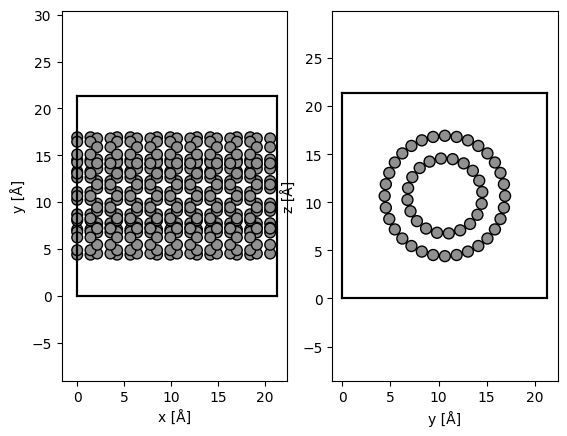

In [153]:
from ase.build import nanotube

tube1 = ase.build.nanotube(10, 0, length=5)

tube2 = ase.build.nanotube(16, 0, length=5)

tube1.rotate("z", 30)

tubes = tube1 + tube2


tubes.center(vacuum=4.4, axis=(0,1))

tubes.rotate('y', 90, rotate_cell=True)

tubes = abtem.standardize_cell(tubes)

fig, (ax1, ax2) = plt.subplots(1, 2)
abtem.show_atoms(tubes, plane='xy', ax=ax1)
abtem.show_atoms(tubes, plane='yz', ax=ax2)

In [154]:
tubes.cell

Cell([21.299999999999997, 21.326192503983112, 21.326192503983116])

In [155]:
frozen_phonons = abtem.FrozenPhonons(tubes, 16, sigmas=.06)

potential = abtem.Potential(frozen_phonons, 
                            gpts = 512,
                            projection = 'infinite', 
                            slice_thickness = 0.5,
                            )

In [156]:
wave = abtem.PlaneWave(energy=100e3)

In [157]:
exit_wave = wave.multislice(potential)

In [158]:
exit_wave.compute()

[########################################] | 100% Completed | 7.02 ss


In [159]:
Cs = -8e-6 * 1e10  # 20 micrometers

ctf = abtem.CTF(Cs=Cs, energy=100e3)
ctf.defocus = ctf.scherzer_defocus
ctf.semiangle_cutoff = ctf.crossover_angle

print(f"defocus = {ctf.defocus:.2f} Å")

defocus = -66.65 Å


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

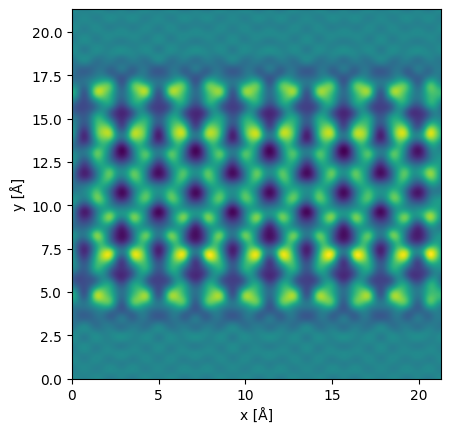

In [160]:
measurement = exit_wave.apply_ctf(ctf).intensity().mean(0)

#measurement = measurement.tile((6,1))

measurement.show()

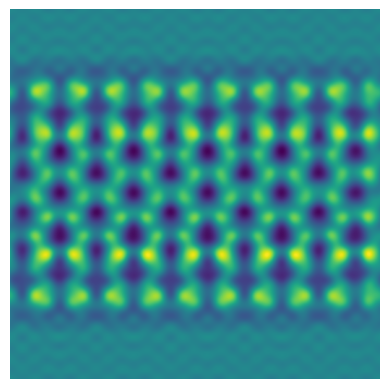

In [161]:
fig, ax = measurement.show()
ax.axis("off")
plt.savefig("../thumbnails/hrtem_quickstart.png", bbox_inches="tight", pad_inches=0)